<div style="border-radius:10px; padding: 15px; background-color: #7e2266 ; font-size:130%; text-align:left">

<h2 align="left"><font color=#ffffff>Google Search Analysis with Python :</font></h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

In [3]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


Top 10 regions for 'Data Analysis':
             Data Analysis
geoName                   
Ethiopia               100
Malawi                  93
Zimbabwe                80
Kenya                   63
Philippines             62
Nigeria                 55
Tanzania                47
China                   42
Zambia                  40
Uganda                  39


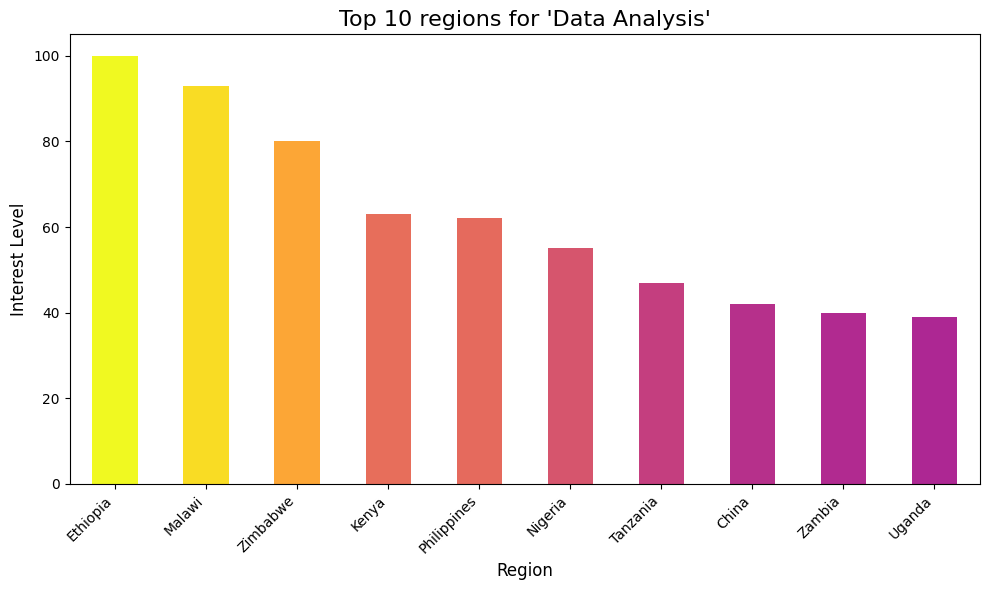

In [6]:
import os
import time
import pandas as pd
from pytrends.request import TrendReq
from pytrends.exceptions import TooManyRequestsError
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to fetch Google Trends data with retry mechanism
def fetch_trends_data(keyword, retries=3, delay=120):  # Increased delay to 120 seconds
    trends = TrendReq(hl='en-US', tz=360)
    
    # Retry mechanism for handling rate limits
    for attempt in range(retries):
        try:
            # Build payload for keyword
            trends.build_payload(kw_list=[keyword])
            
            # Get data by region
            data = trends.interest_by_region()
            data = data.sort_values(by=keyword, ascending=False)
            return data.head(10)
        
        except TooManyRequestsError:
            print(f"Too many requests. Waiting for {delay} seconds before retrying...")
            time.sleep(delay)  # Wait before retrying
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    print(f"Failed to fetch data after {retries} retries.")
    return None

# Function to print the results and plot the bar chart
def print_trends(keyword):
    data = fetch_trends_data(keyword)
    if data is not None:
        print(data)
        plot_trends_bar_chart(data, keyword)
    else:
        print(f"No data available for {keyword}")

# Function to plot a bar chart of regions with colormap
def plot_trends_bar_chart(data, keyword):
    plt.figure(figsize=(10, 6))
    
    # Generate colors from plasma colormap
    colors = cm.plasma(data[keyword] / data[keyword].max())  # Normalize the values
    data[keyword].plot(kind='bar', color=colors)
    
    plt.title(f"Top 10 regions for '{keyword}'", fontsize=16)
    plt.xlabel("Region", fontsize=12)
    plt.ylabel("Interest Level", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Fetch trends for 'Data Analysis'
print("\nTop 10 regions for 'Data Analysis':")
print_trends("Data Analysis")


### Interest over time data


Interest Over Time for 'Data Analysis':
Interest Over Time for 'Data Analysis':

            Data Analysis
date                     
2019-10-06             53
2019-10-13             57
2019-10-20             53
2019-10-27             54
2019-11-03             57
...                   ...
2024-09-08             87
2024-09-15             89
2024-09-22             86
2024-09-29             84
2024-10-06             88

[262 rows x 1 columns]


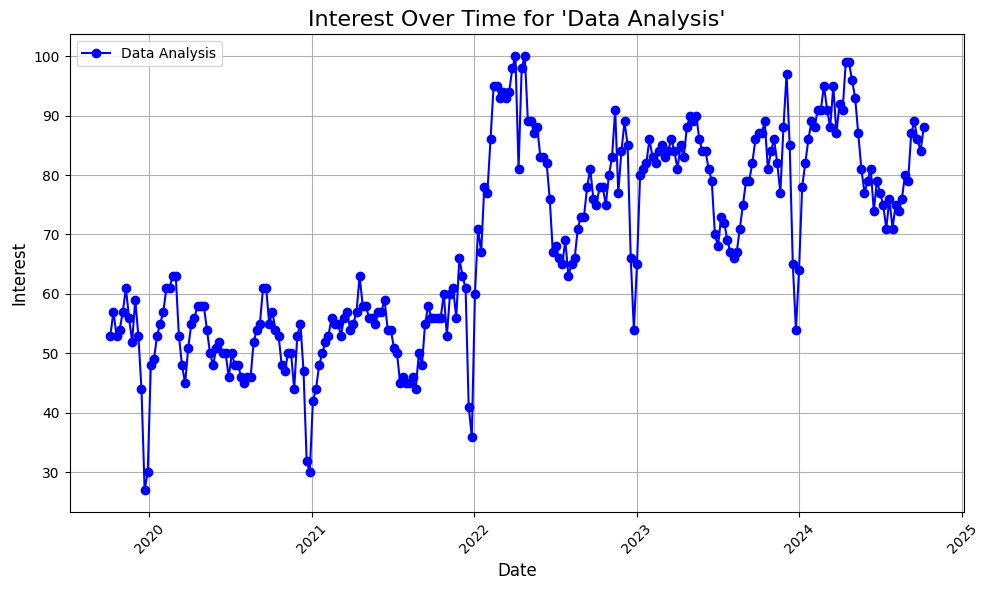

In [8]:
# Function to fetch Google Trends interest over time data
def fetch_interest_over_time(keyword, retries=3, delay=120):
    trends = TrendReq(hl='en-US', tz=360)
    
    # Retry mechanism for handling rate limits
    for attempt in range(retries):
        try:
            # Build payload for keyword
            trends.build_payload(kw_list=[keyword])
            
            # Get interest over time data
            data = trends.interest_over_time()
            
            # Check if data is returned
            if not data.empty:
                return data
            else:
                print(f"No data available for {keyword}")
                return None
        
        except TooManyRequestsError:
            print(f"Too many requests. Waiting for {delay} seconds before retrying...")
            time.sleep(delay)  # Wait before retrying
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    print(f"Failed to fetch data after {retries} retries.")
    return None

# Function to print and plot interest over time
def plot_interest_over_time(keyword):
    data = fetch_interest_over_time(keyword)
    
    if data is not None:
        # Print the interest over time data
        print(f"Interest Over Time for '{keyword}':\n")
        print(data[[keyword]])  # Print only the keyword column with dates as index
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[keyword], label=keyword, color='b', marker='o')
        plt.title(f"Interest Over Time for '{keyword}'", fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Interest', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Fetch and plot interest over time for 'Data Analysis'
print("\nInterest Over Time for 'Data Analysis':")
plot_interest_over_time("Data Analysis")

### Historical hourly interest data


Hourly Interest Over Time for 'Data Analysis':
Hourly Interest Data for 'Data Analysis':
                     Data Analysis  isPartial
date                                         
2024-10-03 15:00:00             74      False
2024-10-03 16:00:00             74      False
2024-10-03 17:00:00             71      False
2024-10-03 18:00:00             67      False
2024-10-03 19:00:00             67      False
...                            ...        ...
2024-10-10 11:00:00             66      False
2024-10-10 12:00:00             69      False
2024-10-10 13:00:00             76      False
2024-10-10 14:00:00             81      False
2024-10-10 15:00:00             99       True

[169 rows x 2 columns]


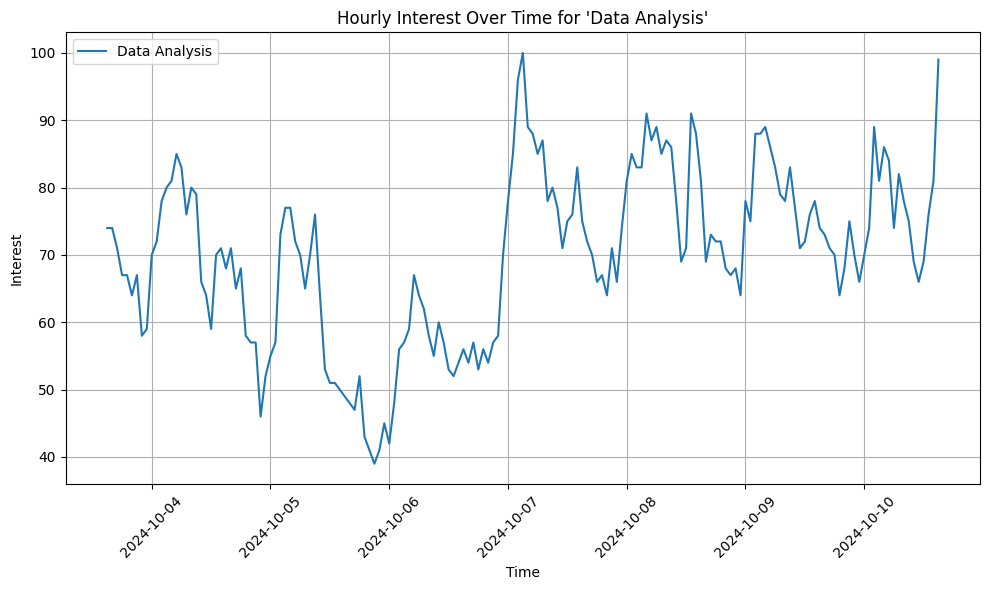

In [9]:
# Function to fetch historical hourly interest data
def fetch_hourly_interest(keyword, retries=3, delay=120):
    trends = TrendReq(hl='en-US', tz=360)
    
    # Retry mechanism for handling rate limits
    for attempt in range(retries):
        try:
            # Build payload for the last 7 days with hourly granularity
            trends.build_payload(kw_list=[keyword], timeframe='now 7-d')
            
            # Get interest over time (this will include hourly data for the past 7 days)
            data = trends.interest_over_time()
            
            # Check if data is returned
            if not data.empty:
                return data
            else:
                print(f"No data available for {keyword}")
                return None
        
        except TooManyRequestsError:
            print(f"Too many requests. Waiting for {delay} seconds before retrying...")
            time.sleep(delay)  # Wait before retrying
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    print(f"Failed to fetch data after {retries} retries.")
    return None

# Function to print and plot hourly interest
def print_and_plot_hourly_interest(keyword):
    data = fetch_hourly_interest(keyword)
    
    if data is not None:
        # Print the data
        print(f"Hourly Interest Data for '{keyword}':")
        print(data)
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data[keyword], label=keyword)
        plt.title(f"Hourly Interest Over Time for '{keyword}'")
        plt.xlabel('Time')
        plt.ylabel('Interest')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Fetch, print, and plot hourly interest for 'Data Analysis'
print("\nHourly Interest Over Time for 'Data Analysis':")
print_and_plot_hourly_interest("Data Analysis")


### Trending Searches for India

In [12]:
# Function to fetch trending searches for India
def fetch_trending_searches(retries=3, delay=60):
    trends = TrendReq(hl='en-US', tz=360)
    
    # Retry mechanism for handling rate limits
    for attempt in range(retries):
        try:
            # Get trending searches in India
            trending_searches = trends.trending_searches(pn='india')
            
            # Check if data is returned
            if not trending_searches.empty:
                return trending_searches
            else:
                print("No trending searches available for India.")
                return None
        
        except TooManyRequestsError:
            print(f"Too many requests. Waiting for {delay} seconds before retrying...")
            time.sleep(delay)  # Wait before retrying
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    print(f"Failed to fetch data after {retries} retries.")
    return None

# Function to print trending searches
def print_trending_searches():
    data = fetch_trending_searches()
    
    if data is not None:
        print("\nTrending Searches in India:\n")
        print(data)
    else:
        print("No data available for trending searches in India.")

# Fetch and print trending searches for India
print_trending_searches()


Trending Searches in India:

                                         0
0                                  Cricket
1                                   Sports
2                                Vettaiyan
3                         Vettaiyan review
4                                      TCS
5                              Latest News
6                       Durga Ashtami 2024
7                  World Mental Health Day
8                         Tata Steel share
9                    Omar Abdullah Kashmir
10  RG Kar senior doctors mass resignation
11                           Breaking news
12                     India vs Bangladesh
13                               IND vs SL
14                                Joe Root
15    South Africa Women vs Scotland Women
16                              Live Score
17                     भारत बनाम बांगलादेश
18                       Bhool Bhulaiyaa 3
19                   Hurricane Milton news


### Related Queries

In [24]:
#Related Queries
try:
    trends.build_payload(kw_list=['Data Analysis'])
    trends = trends.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Data Analysis'")


No related queries found for 'Data Analysis'


### Keyword Suggestions

In [29]:
#Keyword Suggestions
keywords = trends.suggestions(keyword='Data Analysis')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Data analysis,Topic
1,Exploratory data analysis,Topic
2,Python for Data Analysis: Data Wrangling with ...,Book by Wes McKinney
3,Mathematics for Machine Learning,"Book by A. Aldo Faisal, Cheng Soon Ong, and Ma..."
4,Krish Naik,YouTuber


### Scatter plot

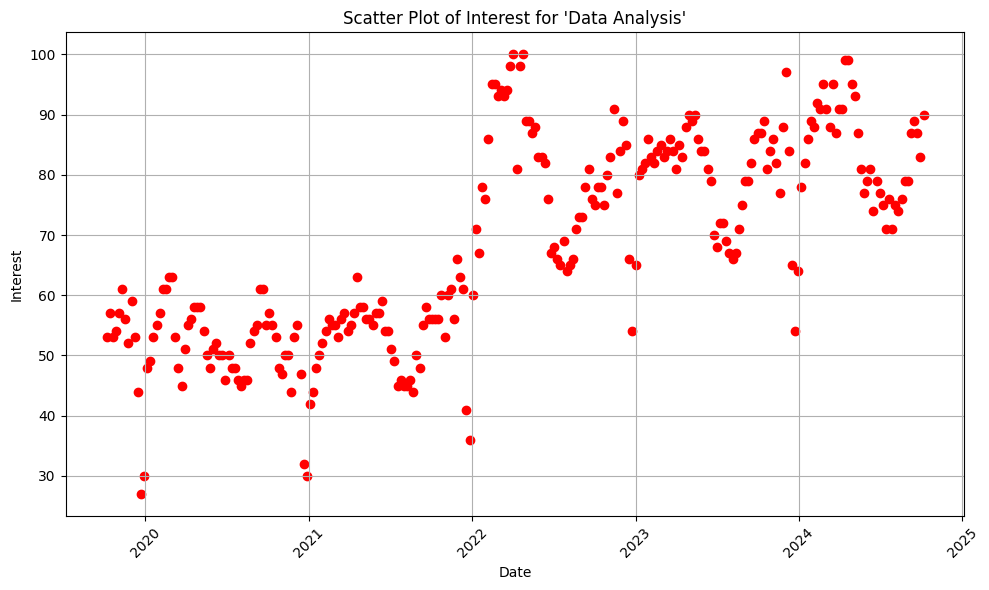

In [41]:
# Function to plot a scatter plot
def plot_scatter(data, keyword):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data[keyword], color='red')
    plt.title(f"Scatter Plot of Interest for '{keyword}'")
    plt.xlabel('Date')
    plt.ylabel('Interest')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
keyword="Data Analysis"
trends = TrendReq(hl='en-US', tz=360)
trends.build_payload(kw_list=[keyword])
data = trends.interest_over_time()            
plot_scatter(data, keyword)
   

### Chart for Top 20 region for interest in 'Data Analysis'

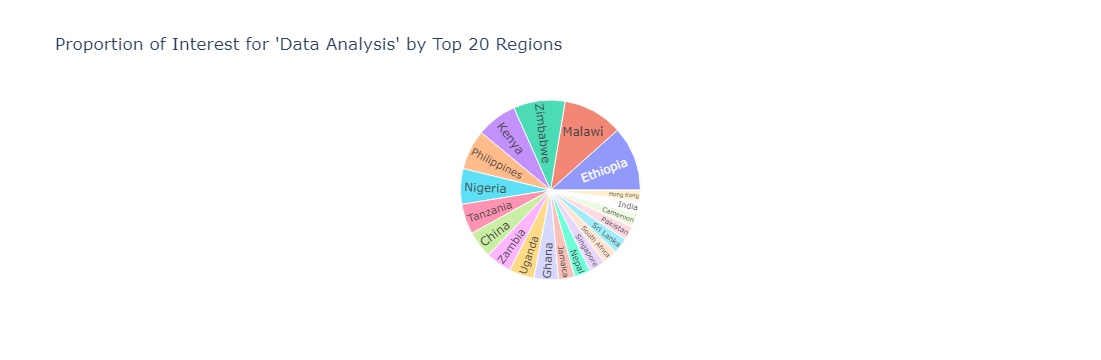

In [55]:
# Function to plot a sunburst chart of top regions with percentages
def plot_sunburst_chart(data, keyword):
    # Select the top 20 regions based on the interest
    top_data = data[keyword].nlargest(20).reset_index()

    # Calculate the percentage of total interest for each region
    total_interest = top_data[keyword].sum()
    top_data['percentage'] = (top_data[keyword] / total_interest) * 100

    # Create a sunburst chart with percentages in the hover data
    fig = px.sunburst(
        data_frame=top_data, 
        path=['geoName'], 
        values=keyword,
        hover_data={'percentage': ':.2f'},
        title=f"Proportion of Interest for '{keyword}' by Top 20 Regions", 
        height=900
    )
    
    # Update the hover template to show percentage
    fig.update_traces(hovertemplate="<b>%{label}</b><br>Interest: %{value}<br>Percentage: %{customdata[0]:.2f}%")
    
    fig.show()

keyword = "Data Analysis"
trends = TrendReq(hl='en-US', tz=360)
trends.build_payload(kw_list=[keyword])

retries = 3
for attempt in range(retries):
    try:
        data = trends.interest_by_region()
        plot_sunburst_chart(data, keyword)
        break  # Exit the loop if successful
    except TooManyRequestsError:
        if attempt < retries - 1:
            print("Too many requests, retrying...")
            time.sleep(120)  # wait for 2 minutes before retrying
        else:
            print("Failed after several attempts.")

So, We get the following points from the analysis -
- Ethiopia is the country with largest intrest for " Data Analysis " among the all other countries in the world.
- The interest over time for " Data Analysis " was high in 2022 and is high again in 2024


In [ ]:
# end